In [1]:
import os
from matplotlib import pyplot as plt
import numpy as np

In [3]:
import h5py

In [4]:
os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE"
for mo in '01,03,04,05,06,07,08,09,10,11,12'.split(','):
    name = '2013-' + mo
    f = h5py.File('/Users/kook/mount/wtk-us/' + name + '.h5', 'r')
    #f = h5py.File('/Users/kook/mount/conus/v1.1.0/wtk_conus_2014.h5', 'r')
    #f = h5py.File('/Users/kook/mount/conus/v1.1.0/2014/wtk_conus_2014_80m.h5', 'r')
    np_data = f['pressure_100m'][::2,550:1300:4,300:800:4]
    np.save('data/nrel_ca_2.4.4/pressure/' + name + '.npy',np_data)

In [4]:
ds = f['windspeed_80m']

In [5]:
ds.shape

(792, 1602, 2976)

In [15]:
792/2

396.0

In [7]:
hello

NameError: name 'hello' is not defined

In [14]:
#fnp.save('data/nrel_ca_2.4.4/wind/2013-04.npy',np_data)

In [100]:
coords[550:1300:4,300:800:4].shape

(188, 125)

In [4]:
nrel['f']['windspeed_80m'][5,5,::100]

array([ 9.277626 ,  9.372238 ,  9.787285 ,  9.152504 ,  7.721184 ,
        7.0101013,  8.450577 ,  7.7394943, 11.047699 ,  8.603165 ,
        0.       ,  0.       ,  5.84124  ,  0.5096588,  7.742546 ,
       10.406815 , 11.5482025, 12.240974 ,  6.482132 ,  5.7069626,
        6.442459 ,  7.5624847,  8.813744 ,  9.140297 ,  8.804588 ,
       11.990723 , 12.88797  ,  9.976501 , 12.729271 , 11.716057 ],
      dtype=float32)

In [ ]:
#ds[550:1300:4,300:800:4]

In [16]:
(792/2)*118*125*64/8/1000/1000

46.728

In [9]:
np_data = nrel['f']['windspeed_80m'][::7*8,550:1300:4,300:800:4]

OSError: Error retrieving data: 429

In [104]:
nrel['f']['windspeed_80m'].shape

(61368, 1602, 2976)

In [107]:
#exactly 7 years
73*5*7*24

61320

In [30]:
ds[0,0,[1,2,3a]]

array([5.688652 , 5.6672897, 5.615402 ], dtype=float32)

In [17]:
list(f)

['DIF',
 'DNI',
 'GHI',
 'datetime',
 'inversemoninobukhovlength_2m',
 'precipitationrate_0m',
 'pressure_0m',
 'pressure_100m',
 'pressure_200m',
 'relativehumidity_2m',
 'status',
 'temperature_100m',
 'temperature_10m',
 'temperature_120m',
 'temperature_140m',
 'temperature_160m',
 'temperature_200m',
 'temperature_2m',
 'temperature_40m',
 'temperature_60m',
 'temperature_80m',
 'winddirection_100m',
 'winddirection_10m',
 'winddirection_120m',
 'winddirection_140m',
 'winddirection_160m',
 'winddirection_200m',
 'winddirection_40m',
 'winddirection_60m',
 'winddirection_80m',
 'windspeed_100m',
 'windspeed_10m',
 'windspeed_120m',
 'windspeed_140m',
 'windspeed_160m',
 'windspeed_200m',
 'windspeed_40m',
 'windspeed_60m',
 'windspeed_80m']

In [3]:
import wind
nrel = wind.setup_nrel()

In [39]:
nrel['f']['coordinates'].shape

(1602, 2976)

In [47]:
#coords = nrel['f']['coordinates'][:,:]

In [48]:
#fnp.save('nrel-coords.npyff',coords)

In [36]:
indicesForCoord(nrel['f'],42,-112)

(1055, 852)

In [54]:
coords_lat = np.vectorize(lambda x: x[0])(coords)
coords_lon = np.vectorize(lambda x: x[1])(coords)

In [61]:
import geopandas as gpd
from shapely.geometry import Point
usa_gpd = gpd.read_file('maps/states_21basic/states.shp')
ca_gpd = usa_gpd[usa_gpd.STATE_ABBR == 'CA']
#ca_gpd


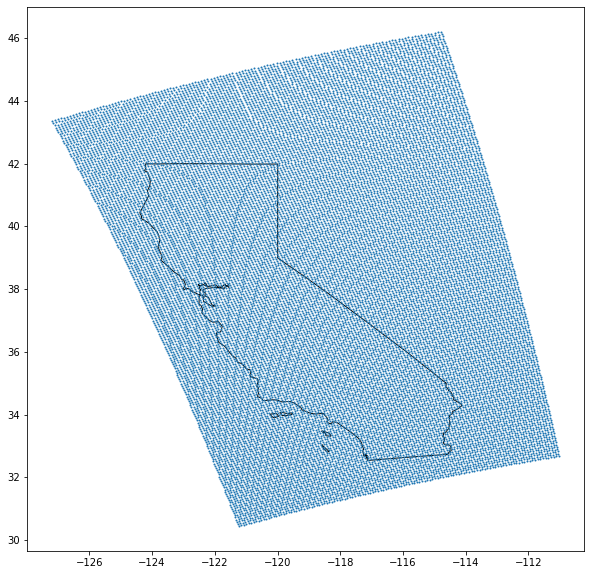

In [103]:
fig, ax = plt.subplots(figsize=(10,10))
step = 4
ax.scatter(coords_lon[550:1300:step,300:800:step].ravel(),coords_lat[550:1300:step,300:800:step].ravel(),s=1)
ca_gpd.plot(color='white',edgecolor='black',ax=ax,zorder=-5)

In [93]:
coords_lon[550:1300:1,300:800:1].shape

(750, 500)

In [ ]:
#665 : -114 long
#1071: 42

In [8]:
from pyproj import Proj 
def indicesForCoord(f, lat_index, lon_index):
    dset_coords = f['coordinates']
    projstring = """+proj=lcc +lat_1=30 +lat_2=60 
                    +lat_0=38.47240422490422 +lon_0=-96.0 
                    +x_0=0 +y_0=0 +ellps=sphere 
                    +units=m +no_defs """
    projectLcc = Proj(projstring)
    origin_ll = reversed(dset_coords[0][0])  # Grab origin directly from database
    origin = projectLcc(*origin_ll)
    
    coords = (lon_index,lat_index)
    coords = projectLcc(*coords)
    delta = np.subtract(coords, origin)
    ij = [int(round(x/2000)) for x in delta]
    return tuple(reversed(ij))

In [9]:
indicesForCoord(f,33,-112)

KeyError: "Unable to open object (object 'coordinates' doesn't exist)"